![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# Introduction to Dynamic Programming

## We solve a complex problem by breaking it down into a collection of simpler subproblems, solving each of those subproblems just once, and storing their solutions.

### The key idea is called "memoization" (not "memorization") and the details appear in this YouTube video

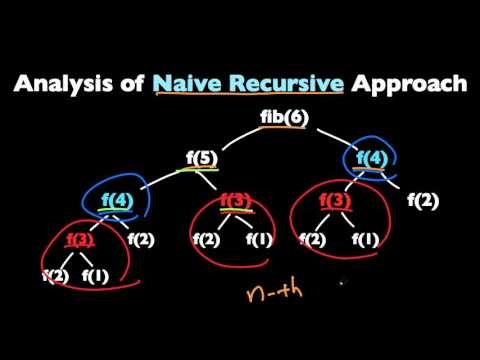

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('e0CAbRVYAWg')

In [2]:
## Let's create a function for the famous Fibonacci sequence, using the "naive recursive" approach.
## You'll notice how slow this process is.

def fib(n):
    if n<=2: return 1
    else: return fib(n-1)+fib(n-2)

fib(30),fib(31),fib(32)

(832040, 1346269, 2178309)

In [3]:
## Now here is how to code Fibonacci, using Dynamic Programming.  Look how fast this program runs!

def fib(n): 
    myset = [0]*(n+1) 
    myset[1]=1
    myset[2]=1
    for k in range(3,n+1):
        myset[k]=myset[k-1]+myset[k-2]
    return myset[n]

fib(30),fib(31),fib(32),fib(100)



(832040, 1346269, 2178309, 354224848179261915075)

In [4]:
## Why does this code work?  Let's add a "print" statement so we see exactly what is going on in each step.
## Can you figure it out?  And why is this better than our first "naive recursion" approach?

def fib(n):
    myset = [0]*(n+1) 
    print("Step 0 ->", myset)
    myset[1]=1
    print("Step 1 ->", myset)
    myset[2]=1
    print("Step 2 ->", myset)
    for k in range(3,n+1):
        myset[k]=myset[k-1]+myset[k-2]
        print("Step" , k , "->", myset)
    return myset[n]

fib(8)

Step 0 -> [0, 0, 0, 0, 0, 0, 0, 0, 0]
Step 1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
Step 2 -> [0, 1, 1, 0, 0, 0, 0, 0, 0]
Step 3 -> [0, 1, 1, 2, 0, 0, 0, 0, 0]
Step 4 -> [0, 1, 1, 2, 3, 0, 0, 0, 0]
Step 5 -> [0, 1, 1, 2, 3, 5, 0, 0, 0]
Step 6 -> [0, 1, 1, 2, 3, 5, 8, 0, 0]
Step 7 -> [0, 1, 1, 2, 3, 5, 8, 13, 0]
Step 8 -> [0, 1, 1, 2, 3, 5, 8, 13, 21]


21

# The Knapsack Problem

## Let's solve one of the hardest problems in Computer Science with dynamic programming.

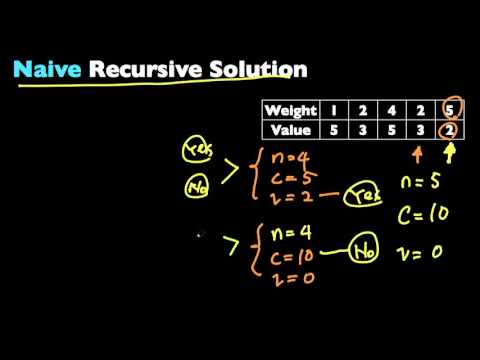

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('xOlhR_2QCXY')

In [7]:
## Suppose there are five items, using the example from the above video.
## Let's assume that the 0th item has weight 0 and value 0, to make our indexing more intuitive.

from collections import namedtuple
Item = namedtuple("Item", ['index', 'weight', 'value'])

item_count = 5
capacity = 10
input_data = [[0,0],[1,5],[2,3],[4,5],[2,3],[5,2]]

items = []
for i in range(0, item_count+1):
    line = input_data[i]
    items.append(Item(i, int(line[0]), int(line[1])))
    
items

[Item(index=0, weight=0, value=0),
 Item(index=1, weight=1, value=5),
 Item(index=2, weight=2, value=3),
 Item(index=3, weight=4, value=5),
 Item(index=4, weight=2, value=3),
 Item(index=5, weight=5, value=2)]

In [8]:
## Set up our matrix V, which will be 6 rows and 11 columns.
## The row indices will range from i=0..5 and the column indices from j=0..10 
## V[i,j] equals the maximum value from the first i items, with total weight at most j.

V = [[0]*(capacity+1) for x in range(0,item_count+1)]
V

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [9]:
## Complete the first step of our algorithm
for w in range(items[1].weight, capacity+1): 
    V[1][w]=items[1].value
V

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [10]:
## Complete the remaining steps of our algorithm, one object at a time.
for i in range(1,len(items)):
    x=items[i]
    for w in range(0,capacity+1):
        if x.weight>w: V[i][w]=V[i-1][w]
        else: V[i][w]=max(V[i-1][w],x.value+V[i-1][w-x.weight])
V

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
 [0, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8],
 [0, 5, 5, 8, 8, 10, 10, 13, 13, 13, 13],
 [0, 5, 5, 8, 8, 11, 11, 13, 13, 16, 16],
 [0, 5, 5, 8, 8, 11, 11, 13, 13, 16, 16]]

In [11]:
optimal_value=V[item_count][capacity]
optimal_value

16

In [12]:
## Now we know that the optimal solution has value=16.  Let's figure out which items were chosen.
## Can you figure out how this code works?

chosen_items=[]
i=item_count
w=capacity
while i>=0 and w>=0:
    if V[i][w]!=V[i-1][w]: 
        if items[i].weight>0: chosen_items.append(items[i])
        w=w-items[i].weight
    i=i-1
chosen_items

[Item(index=4, weight=2, value=3),
 Item(index=3, weight=4, value=5),
 Item(index=2, weight=2, value=3),
 Item(index=1, weight=1, value=5)]

In [13]:
## Now let's try a super-hard example!

item_count = 19
capacity = 31181

input_data=[[0,0],[1945, 4990],[321, 1142],[2945, 7390],[4136, 10372],[1107, 3114],[1022, 2744],[1101, 3102],[2890, 7280],
[962, 2624],[1060, 3020],[805, 2310],[689, 2078],[1513, 3926],[3878, 9656],[13504, 32708],[1865, 4830],[667, 2034],[1833, 4766],
[16553, 40006]]

items = []
for i in range(0, item_count+1):
    line = input_data[i]
    items.append(Item(i, int(line[0]), int(line[1])))
    
items

[Item(index=0, weight=0, value=0),
 Item(index=1, weight=1945, value=4990),
 Item(index=2, weight=321, value=1142),
 Item(index=3, weight=2945, value=7390),
 Item(index=4, weight=4136, value=10372),
 Item(index=5, weight=1107, value=3114),
 Item(index=6, weight=1022, value=2744),
 Item(index=7, weight=1101, value=3102),
 Item(index=8, weight=2890, value=7280),
 Item(index=9, weight=962, value=2624),
 Item(index=10, weight=1060, value=3020),
 Item(index=11, weight=805, value=2310),
 Item(index=12, weight=689, value=2078),
 Item(index=13, weight=1513, value=3926),
 Item(index=14, weight=3878, value=9656),
 Item(index=15, weight=13504, value=32708),
 Item(index=16, weight=1865, value=4830),
 Item(index=17, weight=667, value=2034),
 Item(index=18, weight=1833, value=4766),
 Item(index=19, weight=16553, value=40006)]

In [15]:
totalw=0
totalv=0
V = [[0]*(capacity+1) for x in range(0,item_count+1)]
for w in range(items[1].weight, capacity+1): 
    V[1][w]=items[1].value
for i in range(1,len(items)):
    x=items[i]
    for w in range(0,capacity+1):
        if x.weight>w: V[i][w]=V[i-1][w]
        else: V[i][w]=max(V[i-1][w],x.value+V[i-1][w-x.weight])
optimal_value=V[item_count][capacity]
chosen_items=[]
i=item_count
w=capacity
while i>=0 and w>=0:
    if V[i][w]!=V[i-1][w]: 
        if items[i].weight>0: 
            chosen_items.append(items[i])
            totalw=items[i].weight+totalw
            totalv=items[i].value+totalv
        w=w-items[i].weight
    i=i-1
print("Optimal Value is", optimal_value, "and our Total Capacity is", capacity)
print("And below are our chosen items with total weight", totalw, "and total value", totalv)
chosen_items

Optimal Value is 79954 and our Total Capacity is 31181
And below are our chosen items with total weight 31177 and total value 79954


[Item(index=18, weight=1833, value=4766),
 Item(index=17, weight=667, value=2034),
 Item(index=16, weight=1865, value=4830),
 Item(index=15, weight=13504, value=32708),
 Item(index=13, weight=1513, value=3926),
 Item(index=12, weight=689, value=2078),
 Item(index=11, weight=805, value=2310),
 Item(index=10, weight=1060, value=3020),
 Item(index=9, weight=962, value=2624),
 Item(index=8, weight=2890, value=7280),
 Item(index=7, weight=1101, value=3102),
 Item(index=6, weight=1022, value=2744),
 Item(index=3, weight=2945, value=7390),
 Item(index=2, weight=321, value=1142)]

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)